## Описание проекта ##

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Описание тарифов:**
- `Тариф «Смарт»`
    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 3 рубля
        - сообщение: 3 рубля
        - 1 Гб интернет-трафика: 200 рублей
        
        
- `Тариф «Ультра»`
    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 1 рубль
        - сообщение: 1 рубль
        - 1 Гб интернет-трафика: 150 рублей
        
*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

**Легенда:**

- Таблица users (информация о пользователях):
   - user_id — уникальный идентификатор пользователя
   - first_name — имя пользователя
   - last_name — фамилия пользователя
   - age — возраст пользователя (годы)
   - reg_date — дата подключения тарифа (день, месяц, год)
   - churn_date — дата прекращения пользования тарифом (если значение пропущено, тариф ещё действовал на момент выгрузки)
   - city — город проживания пользователя
   - tarif — название тарифного плана
   
   
- Таблица calls (информация о звонках):
    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок
    
    
- Таблица messages (информация о сообщениях):
    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение
    
    
- Таблица internet (информация об интернет-сессиях):
    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя
    
    
- Таблица tariffs (информация о тарифах):
    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Загрузка файлов с данными и изучение общей информации ##

In [3]:
# импорт требуемых библиотек

import pandas as pd #программная библиотека для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy

import numpy as np #поддержка многомерных массивов; поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами

import matplotlib.pyplot as plt #библиотека для визуализации данных двумерной графикой

import math as mt #модуль содержит некоторые основные математические функции

from scipy  import stats as st #библиотека, предназначенная для выполнения научных и инженерных расчётов

### Датафрейм по пользователям ###

In [4]:
df_users = pd.read_csv('/datasets/users.csv') #загрузка датафрейма по пользователям

In [5]:
df_users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
print('Количество явных дубликатов под удаление:', df_users.duplicated().sum()) # подсчёт явных дубликатов

Количество явных дубликатов под удаление: 0


In [8]:
df_users['age'].describe() # выгрузим статистику по возрасту

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [9]:
display(df_users['city'].unique()) #список городов - представлена вся страна

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [10]:
# оставим только необходимые для анализа столбцы, принимая во внимание баланс: время анализа - качество 

columns = [
    'user_id',
    'city',
    'tariff'  
]

df_users = df_users[columns]

### Датафрейм по статистике звонков ###

In [11]:
df_calls = pd.read_csv('/datasets/calls.csv') #загрузка датафрейма по звонкам

In [12]:
df_calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [13]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
print('Количество явных дубликатов под удаление:', df_calls.duplicated().sum()) # подсчёт явных дубликатов

Количество явных дубликатов под удаление: 0


In [15]:
df_calls['duration'].describe() # выгрузим статистику по продолжительности звонков

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

### Датафрейм по статистике расхода интернета ###

In [16]:
df_internet = pd.read_csv('/datasets/internet.csv') #загрузка датафрейма по интернету

In [17]:
df_internet.tail(3)

,Unnamed: 0,id,mb_used,session_date,user_id
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [18]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [19]:
print('Количество явных дубликатов под удаление:', df_internet.duplicated().sum()) # подсчёт явных дубликатов

Количество явных дубликатов под удаление: 0


In [20]:
df_internet['mb_used'].describe() # выгрузим статистику по продолжительности сессии в сети Интернет

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

### Датафрейм по расходу сообщений ###

In [21]:
df_messages = pd.read_csv('/datasets/messages.csv') #загрузка датафрейма по сообщениям

In [22]:
df_messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [23]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [24]:
print('Количество явных дубликатов под удаление:', df_messages.duplicated().sum()) # подсчёт явных дубликатов

Количество явных дубликатов под удаление: 0


### Датафрейм по описанию тарифов ###

In [25]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv') #загрузка датафрейма по тарифам

In [26]:
#переименуем столбец 'tariff_name' в 'tariff' по аналогии со столбцом датафрейма df_users
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})

In [27]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
#добавим столбец с Гб для расчета тарификации в дальнейшем
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included']/1024

#столбец 'mb_per_month_included' удалим
df_tariffs = df_tariffs.drop(columns=['mb_per_month_included'])

In [29]:
df_tariffs.head()

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,500,550,200,3,3,smart,15.0
1,1000,3000,1950,150,1,1,ultra,30.0


**Вывод:**
- Заголовки датафреймов соответствуют правилам синтаксиса, исправлений не требуется.
- Прямых дубликатов в данных нет.
- Все датафреймы содержат данные, которые выглядят доверительными, очевидных отклонений нет.
- Статистика представлена по всей стране от Астрахани до Якутска.
- Дата во все датафреймах в формате строки, требуется изменение типа.

## Подготовка данных ##

Переведем даты из строки в формат даты 'datetime' для дальнейшей работы с переменной и добавим в датафрейм:
- для звонков;
- для сессий в Интернет;
- для сообщений.

### Подготовка датафрейма по звонкам ###

In [30]:
df_calls['call_datetime'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d') 
df_calls['transaction_month'] = df_calls['call_datetime'].dt.month #месяц в году
df_calls['call_datetime_year'] = df_calls['call_datetime'].dt.year #месяц в году

In [31]:
print('Данные в выборке за', sorted(df_calls['call_datetime_year'].unique()), 'год.') #посмотрим за какой год срез данных

Данные в выборке за [2018] год.


In [32]:
df_calls['duration_round'] = np.ceil(df_calls['duration']) #округление минут до большего значения 

In [33]:
df_calls.head()

,id,call_date,duration,user_id,call_datetime,transaction_month,call_datetime_year,duration_round
0,1000_0,2018-07-25,0.00,1000,2018-07-25,7,2018,0.0
1,1000_1,2018-08-17,0.00,1000,2018-08-17,8,2018,0.0
2,1000_2,2018-06-11,2.85,1000,2018-06-11,6,2018,3.0
3,1000_3,2018-09-21,13.80,1000,2018-09-21,9,2018,14.0
4,1000_4,2018-12-15,5.18,1000,2018-12-15,12,2018,6.0


### Подготовка датафрейма по сессиям в Интернет ###

In [34]:
df_internet['session_datetime'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['transaction_month'] = df_internet['session_datetime'].dt.month #месяц в году

In [35]:
df_internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id,session_datetime,transaction_month
0,0,1000_0,112.95,2018-11-25,1000,2018-11-25,11
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-07,9
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-25,6


### Подготовка датафрейма по сообщениям ###

In [36]:
df_messages['message_datetime'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['transaction_month'] = df_messages['message_datetime'].dt.month #месяц в году

In [37]:
df_messages.head(3)

,id,message_date,user_id,message_datetime,transaction_month
0,1000_0,2018-06-27,1000,2018-06-27,6
1,1000_1,2018-10-08,1000,2018-10-08,10
2,1000_2,2018-08-04,1000,2018-08-04,8


**Вывод:** Изменение типа данных успешно проведено для 3 датафреймов.

Что касается нулевых значений, то может быть несколько причин:
- Мессенджеры требуют постоянного подключения к сети и активной сессии, но их трафик не учитывается.
- Слабое интернет соединение, подключение есть, но передать в сеть ничего не получается.
Надо уточнить со специалистами, которые предоставили выгрузку.


## Проведение расчетов ##

### Анализ количества и продолжительности звонков по пользователям ###

In [38]:
#группируем данные по пользователю, месяцу пользования и производим рассчет количества и суммы

df_calls_id = df_calls.groupby(['user_id','transaction_month']).agg({'duration_round':['sum','count']})

In [39]:
df_calls_id = df_calls_id.reset_index() #сбросим мульти-индекс у сводного датафрейма

In [40]:
df_calls_id.columns = ['user_id', 'transaction_month', 'call_sum','call_count'] #переименуем колонки сводного датафрейма

In [41]:
df_calls_id.head(3)

,user_id,transaction_month,call_sum,call_count
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47


### Анализ продолжительности по сессиям в сети Интернет ###

In [42]:
#группируем данные по пользователю, месяцу пользования и производим рассчет количества и суммы
df_internet_id = df_internet.groupby(['user_id','transaction_month']).agg({'mb_used':'sum'})

In [43]:
#рассчитаем количество пакетов интернета по 1024мб, округлим в большую сторону

df_internet_id['gb_used_round'] = (np.ceil(df_internet_id['mb_used']/1024)).astype('int')

In [44]:
df_internet_id = df_internet_id.reset_index() #сбросим мульти-индекс у сводного датафрейма

In [45]:
df_internet_id.head(3)

,user_id,transaction_month,mb_used,gb_used_round
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14


### Анализ количества сообщений ###

In [46]:
#группируем данные по пользователю, месяцу пользования и производим рассчет количества
df_messages_id = df_messages.groupby(['user_id','transaction_month']).agg({'id':'count'})

In [47]:
#переименуем сболбцы датафрейма

df_messages_id.columns = ['msg_count']

In [48]:
df_messages_id = df_messages_id.reset_index() #сбросим мульти-индекс у сводного датафрейма

In [49]:
df_messages_id.head()

,user_id,transaction_month,msg_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Подготовка сборного датафрейма ###

In [50]:
#объединим в промежуточный датафрейм 2 таблицы (df_users и df_tariffs) по тарифу 
df_raw = df_users.merge(df_tariffs, on='tariff', how='left')

In [51]:
df_raw.head() #тарифы пользователей отображаются верно

,user_id,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,Краснодар,ultra,1000,3000,1950,150,1,1,30.0
1,1001,Москва,smart,50,500,550,200,3,3,15.0
2,1002,Стерлитамак,smart,50,500,550,200,3,3,15.0
3,1003,Москва,ultra,1000,3000,1950,150,1,1,30.0
4,1004,Новокузнецк,ultra,1000,3000,1950,150,1,1,30.0


In [52]:
#объединим в итоговый датафрейм все звонки, сессии в Интернет и сообщения

df = (
    df_calls_id
    .merge(df_messages_id, on=['user_id','transaction_month'], how='outer')
    .merge(df_internet_id, on=['user_id','transaction_month'], how='outer')
    .merge(df_raw, on='user_id', how='outer')
)

In [53]:
df.info() #посмотрим общую информацию об итоговом датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
user_id                  3216 non-null int64
transaction_month        3214 non-null float64
call_sum                 3174 non-null float64
call_count               3174 non-null float64
msg_count                2717 non-null float64
mb_used                  3203 non-null float64
gb_used_round            3203 non-null float64
city                     3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
gb_per_month_included    3216 non-null float64
dtypes: float64(7), int64(7), object(2)
memory usage: 427.1+ KB


In [54]:
df.tail() #итоговый датафрейм выглядит собранным и доверительным

,user_id,transaction_month,call_sum,call_count,msg_count,mb_used,gb_used_round,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
3211,1489,10.0,NaN,NaN,21.0,19559.44,20.0,Санкт-Петербург,smart,50,500,550,200,3,3,15.0
3212,1489,11.0,NaN,NaN,20.0,17491.56,18.0,Санкт-Петербург,smart,50,500,550,200,3,3,15.0
3213,1489,12.0,NaN,NaN,35.0,17322.51,17.0,Санкт-Петербург,smart,50,500,550,200,3,3,15.0
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,Волжский,ultra,1000,3000,1950,150,1,1,30.0
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,Омск,smart,50,500,550,200,3,3,15.0


In [55]:
df = df.drop(columns=['mb_used']) #избавимся от ненужной колонки 'mb_used', т.к. нам нужны Гб для тарификации
df.loc[df['user_id'] == 1302].head(12) #посмотрим на датафрем для рандомного пользователя (12 месяцев 'transaction_month')

,user_id,transaction_month,call_sum,call_count,msg_count,gb_used_round,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
1890,1302,1.0,76.0,12.0,28.0,5.0,Уфа,smart,50,500,550,200,3,3,15.0
1891,1302,2.0,194.0,24.0,77.0,13.0,Уфа,smart,50,500,550,200,3,3,15.0
1892,1302,3.0,210.0,34.0,77.0,16.0,Уфа,smart,50,500,550,200,3,3,15.0
1893,1302,4.0,306.0,43.0,59.0,15.0,Уфа,smart,50,500,550,200,3,3,15.0
1894,1302,5.0,241.0,35.0,80.0,19.0,Уфа,smart,50,500,550,200,3,3,15.0
1895,1302,6.0,171.0,27.0,77.0,20.0,Уфа,smart,50,500,550,200,3,3,15.0
1896,1302,7.0,173.0,30.0,77.0,12.0,Уфа,smart,50,500,550,200,3,3,15.0
1897,1302,8.0,182.0,27.0,82.0,20.0,Уфа,smart,50,500,550,200,3,3,15.0
1898,1302,9.0,257.0,46.0,68.0,15.0,Уфа,smart,50,500,550,200,3,3,15.0
1899,1302,10.0,197.0,29.0,73.0,15.0,Уфа,smart,50,500,550,200,3,3,15.0


In [56]:
def money(row):
    
    #ставки по тарифу
    calls_tarif = row['minutes_included']
    msg_tafiff = row['messages_included']
    int_tafir = row['gb_per_month_included']
    
    #фактические расходы
    calls = row['call_sum']
    msg = row['msg_count']
    internet = row['gb_used_round']    
    
    #тариф и дополнительные ставки за превышение
    tarif = row['rub_monthly_fee']
    calls_add_cost = row['rub_per_minute']
    int_add_cost = row['rub_per_gb']
    msg_add_cost = row['rub_per_message']
    
    money = 0 
    money_calls = 0
    money_msg = 0
    money_int = 0
    
    if calls > calls_tarif:
        money_calls = (calls-calls_tarif)*calls_add_cost #если идет превышение тарифа по звонкам, то расчет по условиям тарифа
    else:
        money_calls #если превышения нет, то 0 (ноль)
        
    if msg > msg_tafiff:
        money_msg = (msg-msg_tafiff)*msg_add_cost #если идет превышение тарифа по сессиям в Интернет, то расчет по условиям тарифа
    else:
        money_msg #если превышения нет, то 0 (ноль)
        
    if internet > int_tafir:
        money_int = (internet-int_tafir)*int_add_cost #если идет превышение тарифа по сообщениям, то расчет по условиям тарифа
    else:
        money_int #если превышения нет, то 0 (ноль)
        
    return money_calls + money_msg + money_int + tarif #сумма затрат по 3 категориям

In [57]:
df['money'] = df.apply(money, axis=1)

In [58]:
df.loc[df['user_id'] == 1302].head(12) #посмотрим расчет для рандомного пользователя (12 месяцев 'transaction_month')

,user_id,transaction_month,call_sum,call_count,msg_count,gb_used_round,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,money
1890,1302,1.0,76.0,12.0,28.0,5.0,Уфа,smart,50,500,550,200,3,3,15.0,550.0
1891,1302,2.0,194.0,24.0,77.0,13.0,Уфа,smart,50,500,550,200,3,3,15.0,631.0
1892,1302,3.0,210.0,34.0,77.0,16.0,Уфа,smart,50,500,550,200,3,3,15.0,831.0
1893,1302,4.0,306.0,43.0,59.0,15.0,Уфа,smart,50,500,550,200,3,3,15.0,577.0
1894,1302,5.0,241.0,35.0,80.0,19.0,Уфа,smart,50,500,550,200,3,3,15.0,1440.0
1895,1302,6.0,171.0,27.0,77.0,20.0,Уфа,smart,50,500,550,200,3,3,15.0,1631.0
1896,1302,7.0,173.0,30.0,77.0,12.0,Уфа,smart,50,500,550,200,3,3,15.0,631.0
1897,1302,8.0,182.0,27.0,82.0,20.0,Уфа,smart,50,500,550,200,3,3,15.0,1646.0
1898,1302,9.0,257.0,46.0,68.0,15.0,Уфа,smart,50,500,550,200,3,3,15.0,604.0
1899,1302,10.0,197.0,29.0,73.0,15.0,Уфа,smart,50,500,550,200,3,3,15.0,619.0


**Вывод:**
- Сводный датафрейм успешно собран и готов для использования при анализе данных.
- Проведены расчеты для каждого пользователя по:
        - количеству сделанных звонков и израсходованных минут разговора по месяцам;
        - количеству отправленных сообщений по месяцам;
        - объему израсходованного интернет-трафика по месяцам;
        - помесячную выручку с каждого пользователя.

## Анализ данных ## 

### Гистограммы распределения ###

- Проанализируем гистограммы распределения для каждого из тарифов по интересующим нас показателям:
    - количество звонков;
    - использование Интренет трафика;
    - использование сообщений.

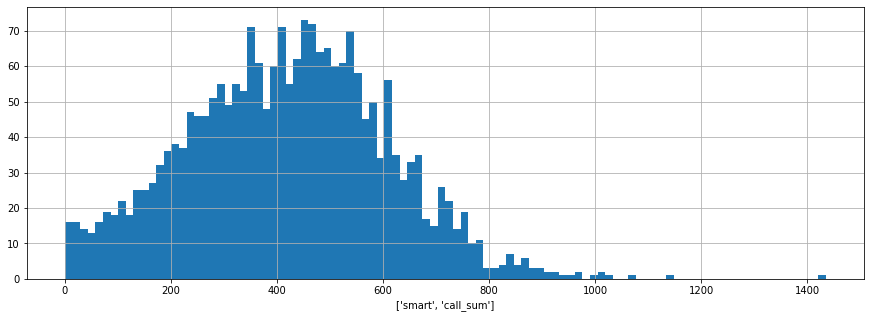

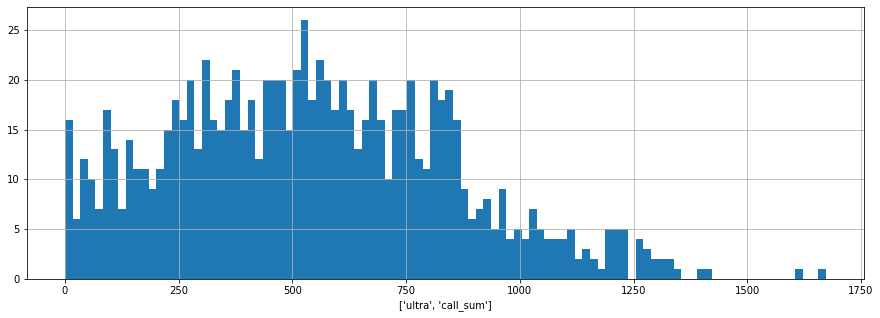

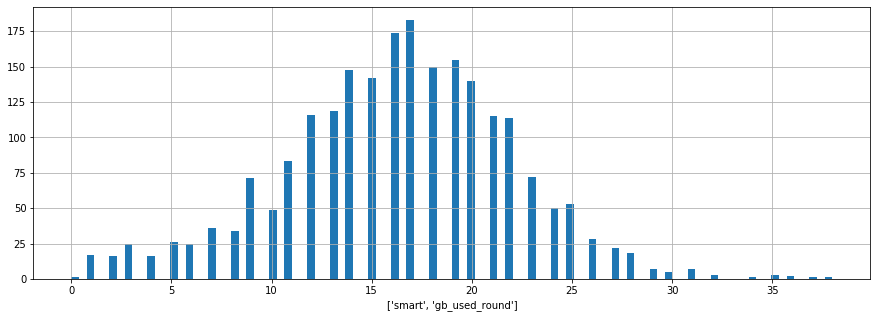

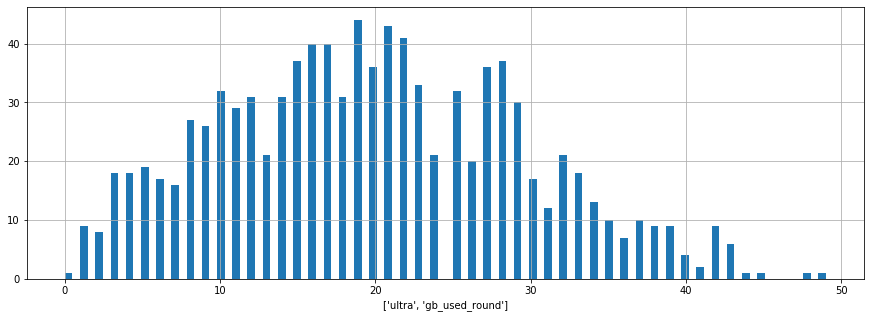

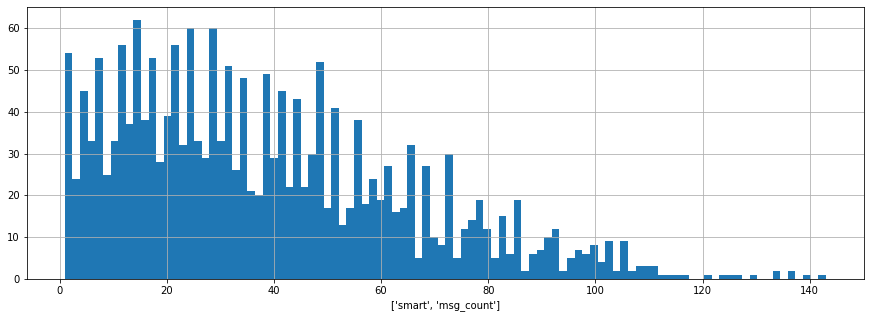

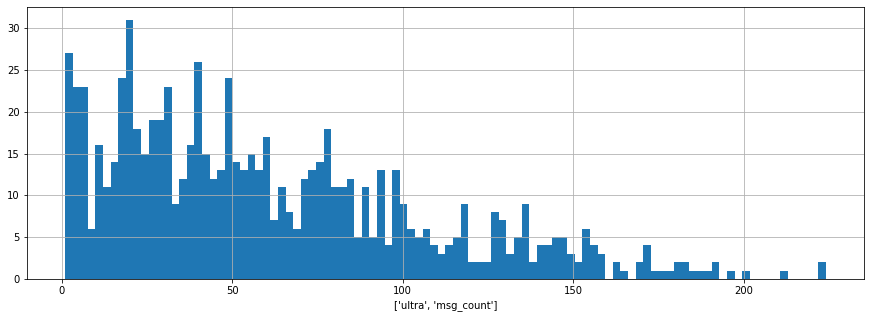

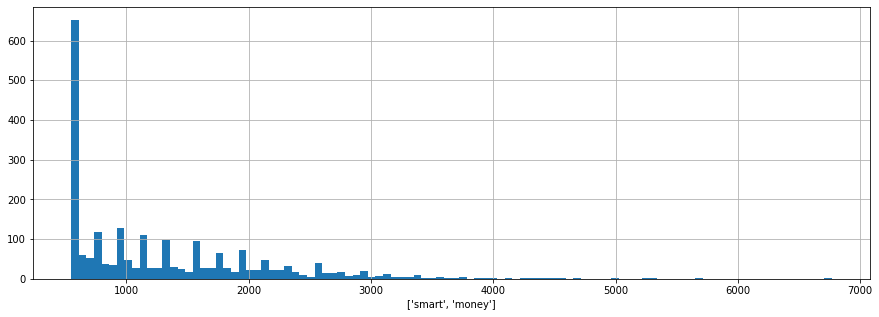

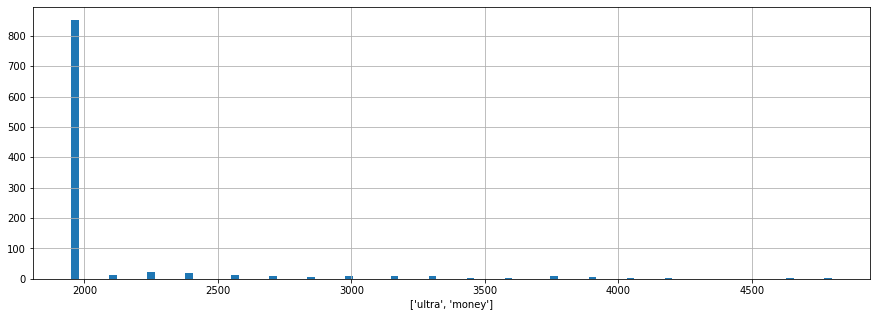

In [75]:
tariff_list = list(df['tariff'].sort_values().unique())

column_list = ['call_sum','gb_used_round','msg_count','money']

for column in column_list:
    for tariff_ in tariff_list:
        plt.figure()
        df.loc[df['tariff'] == tariff_, column].hist(
        bins=100,
        grid=True,
        figsize=(15,5)
    ).set_xlabel([tariff_,column])

**Предварительные наблюдения:**

**`call_sum`**
- Клиенты тарифа "смарт" активно пользуются звонками. Наиболее часто встречаемые значения по количеству использованных минут от 300 до 500 в пределах лимита по тарифу, есть и превышения. Нормальное распределение для непрерывной переменной.
- Клиенты тарифа "ультра" активно пользуются звонками, но много нулевых значений. Распределение более равномерное, без резкого увеличения частоты той или иной величины. Визуально, больше всего значений попадает в диапазон от 250 до 800 минут. Распределение не показывает, что кто-то выбирает все 3000 бесплатных минут: 50 часов, 1.67 часа разговоров каждый день. 

**`gb_used_round`**
- Клиенты тарифа "смарт" активно пользуются интернетом (представлено нормальное распределение дискретной величины). Визуально большая часть значений попадает в интервал от 13 до 20 Гб с пиком в районе 16-17 Гб, что выше бесплатного лимита по тарифу.
- Клиенты тарифа "ультра" еще более активно пользуются интернетом. Визуально большая часть значений попадает в интервал от 15 до 28 Гб. Значительная часть пользователей не выбирает все 30 Гб, входящих в тариф.

**`msg_count`**
- Клиенты тарифа "смарт" активно пользуются сообщениями до 60-70 сообщений в месяц, потом идет резкое снижение (представлено распределение дискретной величины, похожее на распределение Пуассона).
- Клиенты тарифа "ультра" также активны в отправке сообщений, количество пиков меньше, чем у клиентов с тарифом "смарт". Много тех, кто отправляет свыше 120 сообщений в месяц, что редно для клиентов "смарт".

**`money`**
- Клиенты тарифа "смарт" по затратам в месяц чаще всего выбиваются за пределы тарифа, есть лидеры с затратами более 5000р в месяц (представлено распределение дискретной величины, похожее на распределение Пуассона). У клиентов тарифа "ультра" меньше таких выходов за пределы и максимальные затраты меньше (до 5000р).

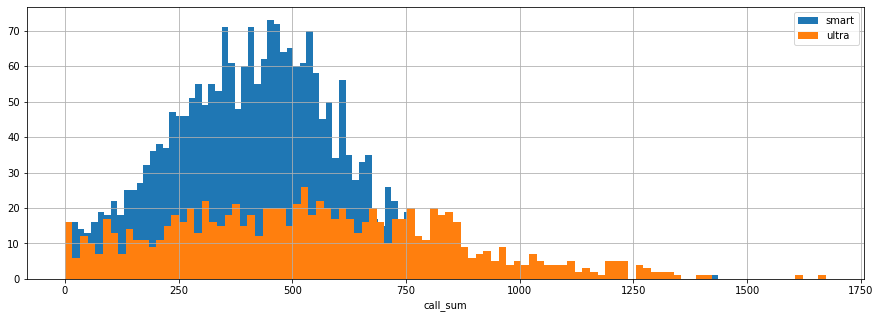

In [81]:
tariff_list = list(df['tariff'].sort_values().unique())

for tariff_ in tariff_list:
    df.loc[df['tariff'] == tariff_, 'call_sum'].hist(
        bins=100,
        grid=True,
        figsize=(15,5)
    ).set_xlabel('call_sum')
    plt.legend(["smart","ultra"])

### Среднее количество, дисперсия и стандартное отклонение ###

In [60]:
column_list_2 = ['call_sum','gb_used_round','msg_count']

for column in column_list_2:
    for tariff_ in tariff_list:
        mean = np.mean(df.loc[df['tariff'] == tariff_][column]) # расчет среднего
        variance_est = np.var(df.loc[df['tariff'] == tariff_][column], ddof=1) # оцека дисперсии по части выборки
        standard_deviation_est = np.std(df.loc[df['tariff'] == tariff_][column], ddof=1) #оцека стандартного отклонения (или корень из дисперсии)
    
        print('Тариф:',tariff_)
        print('Расчет для:', column)
        print('Среднее количество:', round((mean),1))
        print('Дисперсия:', round((variance_est),1))
        print('Cтандартное отклонение:', round((standard_deviation_est),1))
        print()

Тариф: smart
Расчет для: call_sum
Среднее количество: 419.1
Дисперсия: 35844.2
Cтандартное отклонение: 189.3

Тариф: ultra
Расчет для: call_sum
Среднее количество: 545.5
Дисперсия: 94203.4
Cтандартное отклонение: 306.9

Тариф: smart
Расчет для: gb_used_round
Среднее количество: 16.3
Дисперсия: 32.9
Cтандартное отклонение: 5.7

Тариф: ultra
Расчет для: gb_used_round
Среднее количество: 19.7
Дисперсия: 94.1
Cтандартное отклонение: 9.7

Тариф: smart
Расчет для: msg_count
Среднее количество: 38.7
Дисперсия: 717.6
Cтандартное отклонение: 26.8

Тариф: ultra
Расчет для: msg_count
Среднее количество: 61.2
Дисперсия: 2109.7
Cтандартное отклонение: 45.9



**Вывод:**

**`call_sum`**
- Клиенты тарифа "ультра" более активно пользуются звонками. Много пользователей, кто совершает много звонков либо они продолжительные, если принять что справа от среднего продолжительность звонков по правилу 3 сигм равна среднему + стандартное отклонение умноженное на 3. 

**`gb_used_round`**
- В среднем клиенты тарифа "смарт" используют Интренет сверх установленного в тарифе лимита - 15 Гб и платят дополнительно в отличии от клиентов с тарифом "ультра", которые укладываются в 30 Гб.

**`msg_count`**
- Клиенты тарифа "ультра" более активно пользуются сообщениями. Высокий лимит в 1000 выглядит чрезмерным, пользователи не отправляют такое количество.

## Проверка гипотез ##

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» ###

`Гипотеза о равенстве средних двух генеральных совокупностей:`
- Гипотеза H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна (H0 всегда со знаком =).
- Гипотеза H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

*Рассмотрим три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:*

- [x] Генеральные совокупности не должны зависеть друг от друга.
    - Да, в нашем случае пользователи разных тарифов независимы друг от друга.
- [x] Выборочные средние должны быть нормально распределены.
    - А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
    - Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Утверждение верно, даже если сама генеральная совокупность не распределена нормально.

In [61]:
#соберем два датафрейма по затратам клиентов, исходя из тарифа
df_smart = df.query('tariff == "smart"')['money']
df_ultra = df.query('tariff == "ultra"')['money']

In [62]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results_tariff = st.ttest_ind(
    df_smart, 
    df_ultra)

print('Среднее по тарифу "смарт"', round(df_smart.mean(),1))
print('Среднее по тарифу "ультра"', round(df_ultra.mean(),1))
print('p-значение: ', results_tariff.pvalue)

if results_tariff.pvalue < alpha:
    print()
    print("Отвергаем нулевую гипотезу")
else:
    print()
    print("Не получилось отвергнуть нулевую гипотезу") 

Среднее по тарифу "смарт" 1289.6
Среднее по тарифу "ультра" 2070.0
p-значение:  8.081909555489933e-161

Отвергаем нулевую гипотезу


**Вывод:**

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно стремится к нулю. Это слишком маленькая вероятность, чтобы делать вывод о том, что выручка одинакова. Клиенты тарифа "смарт" в среднем переплачивают, но их затраты ниже клиентов "ультра".

### Cредняя выручка пользователей из Москвы и других регионов ###

`Гипотеза о равенстве средних двух генеральных совокупностей:`
- Гипотеза H0: средняя выручка пользователей в Москве и других регионах одинакова.
- Гипотеза H1: средняя выручка пользователей в Москве и других регионах не одинакова.

In [63]:
df['region'] = "другой" #добавление нового столбца 'region', где все регионы "другие"

df.loc[df['city'] == "Москва", 'region'] = "Москва" #изменение всех "других" на "первый", если номер этажа 1

In [64]:
#соберем два датафрейма по затратам клиентов, исходя из тарифа
df_msk = df.query('region == "Москва"')['money']
df_other = df.query('region == "другой"')['money']

In [65]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results_region = st.ttest_ind(
    df_msk, 
    df_other)

print('Средняя выручка в Москве', round(df_msk.mean(),1))
print('Средняя выручка в регионах', round(df_other.mean(),1))
print('p-значение: ', results_region.pvalue)

if results_region.pvalue < alpha:
    print()
    print("Отвергаем нулевую гипотезу")
else:
    print()
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя выручка в Москве 1546.7
Средняя выручка в регионах 1524.7
p-значение:  0.5400751614511182

Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно >5% - большая вероятность (выше уровня статистической значимости), чтобы делать вывод о значимом различии между выручкой с пользователя в Москве и регионе.

## Вывод ##

По итогам работы над проектом были проделаны следующие шаги:
1. Загружены 5 различных датафреймов, которые были подготовлены для анализа.
    - Данные были предобработаны, изменены форматы столбцов, к примеру, переведены в формат "дата" для работы с месяцами и годами. 
    - Информация была сведена по каждому пользователю и месяцу использования тарифа для каждой интересующей нас метрики:
         - количество звонков;
         - продолжительность сессий в сети Интернет;
         - количество отправленных сообщений.
         
         
2. Данные 5 датафреймов были сведены в единую таблицу для дальнейшего использования и анализа.


3. Проведены расчеты для каждого пользователя по:
    - количеству сделанных звонков и израсходованных минут разговора по месяцам;
    - количеству отправленных сообщений по месяцам;
    - объему израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя.
    
    
4. Проведен анализ:

- **По гистограммам**

**`call_sum`**
    - Клиенты тарифа "смарт" активно пользуются звонками. Наиболее часто встречаемые значения по количеству использованных минут от 300 до 500 в пределах лимита по тарифу, есть и превышения. Нормальное распределение для непрерывной переменной.
    - Клиенты тарифа "ультра" активно пользуются звонками, но много нулевых значений. Распределение более равномерное, без резкого увеличения частоты той или иной величины. Визуально, больше всего значений попадает в диапазон от 250 до 800 минут. Распределение не показывает, что кто-то выбирает все 3000 бесплатных минут: 50 часов, 1.67 часа разговоров каждый день. 

**`gb_used_round`**
    - Клиенты тарифа "смарт" активно пользуются интернетом (представлено нормальное распределение дискретной величины). Визуально большая часть значений попадает в интервал от 13 до 20 Гб с пиком в районе 16-17 Гб, что выше бесплатного лимита по тарифу.
    - Клиенты тарифа "ультра" еще более активно пользуются интернетом. Визуально большая часть значений попадает в интервал от 15 до 28 Гб. Значительная часть пользователей не выбирает все 30 Гб, входящих в тариф.

**`msg_count`**
    - Клиенты тарифа "смарт" активно пользуются сообщениями до 60-70 сообщений в месяц, потом идет резкое снижение (представлено распределение дискретной величины, похожее на распределение Пуассона).
    - Клиенты тарифа "ультра" также активны в отправке сообщений, количество пиков меньше, чем у клиентов с тарифом "смарт". Много тех, кто отправляет свыше 120 сообщений в месяц, что редно для клиентов "смарт".

**`money`**
    - Клиенты тарифа "смарт" по затратам в месяц чаще всего выбиваются за пределы тарифа, есть лидеры с затратами более 5000р в месяц (представлено распределение дискретной величины, похожее на распределение Пуассона). У клиентов тарифа "ультра" меньше таких выходов за пределы и максимальные затраты меньше (до 5000р).

- **По среднему значению и стандартному отклонению:**

**`call_sum`**
    - Клиенты тарифа "ультра" более активно пользуются звонками. Много пользователей, кто совершает много звонков либо они продолжительные, если принять что справа от среднего продолжительность звонков по правилу 3 сигм равна среднему + стандартное отклонение умноженное на 3. 

**`gb_used_round`**
    - В среднем клиенты тарифа "смарт" используют Интренет сверх установленного в тарифе лимита - 15 Гб и платят дополнительно в отличии от клиентов с тарифом "ультра", которые укладываются в 30 Гб.

**`msg_count`**
    - Клиенты тарифа "ультра" более активно пользуются сообщениями. Высокий лимит в 1000 выглядит чрезмерным, пользователи не отправляют такое количество.

5. Выдвинуты гипотезы:

    - Гипотеза H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.
        - Отвергаем нулевую гипотезу. Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно стремится к нулю. Это слишком маленькая вероятность, чтобы делать вывод о том, что выручка одинакова, она разная H1.
        
    - Гипотеза H0: средняя выручка пользователей в Москве и других регионах одинакова.
        - Не получилось отвергнуть нулевую гипотезу. Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно >5% - выше уровня статистической значимости, чтобы делать вывод о значимом различии между выручкой с пользователя в Москве и регионе.

**Чек-лист:**
- [x] Открыть файл с данными и изучить общую информацию
- [x] Подготовить данные:
    - [x] Привести данные к нужным типам;
    - [x] Найти и исправить ошибки в данных.
- [x] Проведение расчетов:
    - Посчитать для каждого пользователя:
        - [x] количество сделанных звонков и израсходованных минут разговора по месяцам;
        - [x] количество отправленных сообщений по месяцам;
        - [x] объем израсходованного интернет-трафика по месяцам;
        - [x] помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
- [x] Проанализировать данные: описать поведение клиентов оператора, исходя из выборки.
    - [x] Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    - [x] Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
- [x] Проверить гипотезы:
    - [x] средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - [x] средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
        - [x] пояснить, как вы формулировали нулевую и альтернативную гипотезы;
        - [x] пояснить, какой критерий использовали для проверки гипотез и почему.
- [x] Привести вывод к каждой главе
- [x] Привести общий вывод